<a href="https://colab.research.google.com/github/AlvaroMartins7/misc/blob/main/mnist_AlvaroMartins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch tensorflow matplotlib --quiet

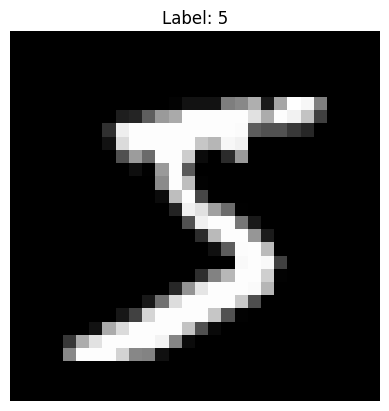

In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# device do pytorch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# carregando mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalizando os datasets
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
x_train = np.expand_dims(x_train, axis=1)
x_test = np.expand_dims(x_test, axis=1)

# Exibindo uma amostra
plt.imshow(x_train[0][0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

In [3]:
# preparando tensores
X_train = torch.tensor(x_train)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(x_test)
y_test = torch.tensor(y_test, dtype=torch.long)

# preparando dataloaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

In [4]:
import torch.nn as nn
import torch.nn.functional as F

# cnn
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [batch, 32, 14, 14]
        x = self.pool(F.relu(self.conv2(x)))  # [batch, 64, 7, 7]
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [5]:
# treino
model = CNN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    model.train()
    total_loss = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Época {epoch+1}, perda média: {total_loss / len(train_loader):.4f}")

Época 1, perda média: 0.1754
Época 2, perda média: 0.0493
Época 3, perda média: 0.0351
Época 4, perda média: 0.0254
Época 5, perda média: 0.0190
Época 6, perda média: 0.0149
Época 7, perda média: 0.0134
Época 8, perda média: 0.0100
Época 9, perda média: 0.0081
Época 10, perda média: 0.0074
Época 11, perda média: 0.0070
Época 12, perda média: 0.0043
Época 13, perda média: 0.0054
Época 14, perda média: 0.0041
Época 15, perda média: 0.0027
Época 16, perda média: 0.0043
Época 17, perda média: 0.0037
Época 18, perda média: 0.0035
Época 19, perda média: 0.0039
Época 20, perda média: 0.0041
Época 21, perda média: 0.0025
Época 22, perda média: 0.0035
Época 23, perda média: 0.0025
Época 24, perda média: 0.0031
Época 25, perda média: 0.0023
Época 26, perda média: 0.0026
Época 27, perda média: 0.0010
Época 28, perda média: 0.0024
Época 29, perda média: 0.0018
Época 30, perda média: 0.0019
Época 31, perda média: 0.0021
Época 32, perda média: 0.0030
Época 33, perda média: 0.0002
Época 34, perda méd

In [6]:
# resultados
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print(f"Acurácia no conjunto de teste: {100 * correct / total:.2f}%")

Acurácia no conjunto de teste: 99.18%
